In [22]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import rc
import seaborn as sns
from scipy import stats as ss
import statsmodels.api as sm
import statsmodels.formula.api as smf

In [2]:
height = np.array([181, 161, 170, 160, 158, 168, 162, 179, 183, 178,
                   171, 177, 163, 158, 160, 160, 158, 173, 160, 163,
                   167, 165, 163, 173, 178, 170, 167, 177, 175, 169,
                   152, 158, 160, 160, 159, 180, 169, 162, 178, 173,
                   173, 171, 171, 170, 160, 167, 168, 166, 164, 173,
                   180])
weight = np.array([78, 49, 52, 53, 50, 57, 53, 54, 71, 73,
                   55, 73, 51, 53, 65, 48, 59, 64, 48, 53,
                   78, 45, 56, 70, 68, 59, 55, 64, 59, 55,
                   38, 45, 50, 46, 50, 63, 71, 52, 74, 52,
                   61, 65, 68, 57, 47, 48, 58, 59, 55, 74,
                   74])

In [4]:
np.corrcoef(height, weight)[0][1]

0.7362765055636866

In [7]:
data = {'height':height, 'weight':weight}
df_data = pd.DataFrame(data)

In [23]:
x = smf.ols('weight ~ height', data).fit()
x.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 weight   R-squared:                       0.542
Model:                            OLS   Adj. R-squared:                  0.533
Method:                 Least Squares   F-statistic:                     58.01
Date:                Fri, 26 Aug 2022   Prob (F-statistic):           7.40e-10
Time:                        16:19:10   Log-Likelihood:                -168.30
No. Observations:                  51   AIC:                             340.6
Df Residuals:                      49   BIC:                             344.5
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   -100.7820     20.912     -4.819      0.000    -142.806     -58.758
height         0.9479      0.124      7.616      0.000       0.698       1.198
==============================================================================
Omnibus:                        5.480   Durbin-Watson:                   2.220
Prob(Omnibus):                  0.065   Jarque-Bera (JB):                4.425
Skew:                           0.569   Prob(JB):                        0.109
Kurtosis:                       3.886   Cond. No.                     3.75e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 3.75e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [24]:
x.conf_int(0.05)

,0,1
Intercept,-142.806014,-58.757955
height,0.697793,1.197985


In [14]:
rc('font', family='Malgun Gothic')

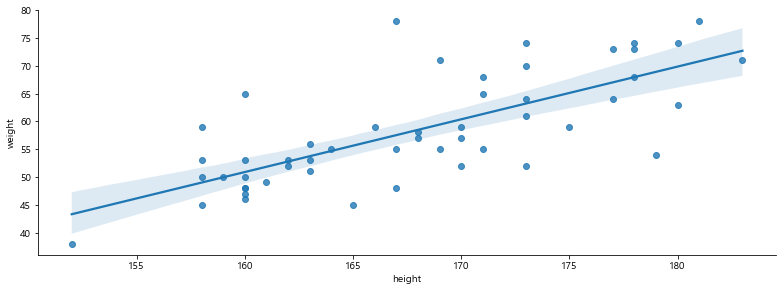

In [17]:
grid = sns.lmplot(data=df_data, x='height', y='weight')
grid.fig.set_size_inches(12, 4)

<AxesSubplot:xlabel='height', ylabel='weight'>

c:\Users\admin\anaconda3\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


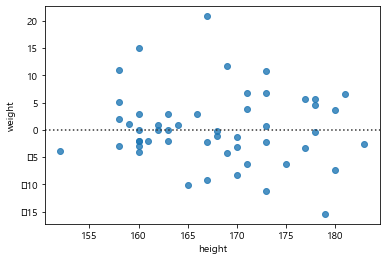

In [29]:
sns.residplot(data=df_data, x='height', y='weight', robust=True)

In [30]:
x.resid

0      7.214002
1     -2.828210
2     -8.359215
3      2.119679
4      1.015458
5     -1.463436
6      0.223901
7    -14.890219
8     -1.681777
9      5.057670
10    -6.307104
11     6.005560
12    -2.723989
13     4.015458
14    14.119679
15    -2.880321
16    10.015458
17     0.797117
18    -2.880321
19    -0.723989
20    20.484454
21   -10.619768
22     2.276011
23     6.797117
24     0.057670
25    -1.359215
26    -2.515546
27    -2.994440
28    -6.098662
29    -4.411325
30    -5.297205
31    -3.984542
32    -0.880321
33    -4.880321
34     0.067569
35    -6.838109
36    11.588675
37    -0.776099
38     6.057670
39   -11.202883
40    -2.202883
41     3.692896
42     6.692896
43    -3.359215
44    -3.880321
45    -9.515546
46    -0.463436
47     2.432343
48     0.328122
49    10.797117
50     4.161891
dtype: float64

c:\Users\admin\anaconda3\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


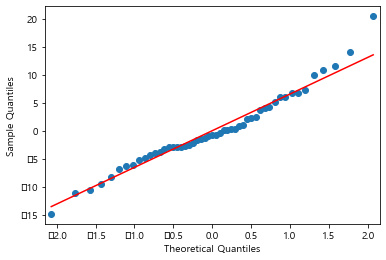

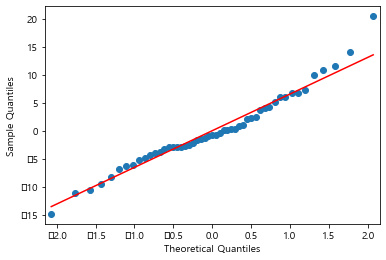

In [32]:
sm.qqplot(x.resid, line='s')